In [1]:
import numpy as np
import pandas as pd
from pandas import Series

def encabezado(titulo):
  print()
  print("-" * 50)
  print("[" + titulo + "]")
  print("-" * 50)


# pandas: librería para trabajar con datos
- Procesado  
- Extracción  
- Manipulación

### Dependencias de librerías de análisis de datos

![dependencias](https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/imagenes/dependencias_pandas.png)

## Diferencias entre Pandas y Numpy  

---  
### NumPy  
* Estructuras de datos de bajo nivel
* Arreglos multidimensionales 
* Operaciones matemáticas avanzadas sobre arreglos 
---
### Pandas
* Estructuras de datos de alto nivel 
* Datos tabulares
* Alineación de datos
* Puede trabajar aunque haya datos faltantes
* Hay operaciones de bases de datos como *group*, *merge* y *join*
* Se pueden utilizar operaciones de NumPy o de SciPy sobre las estructuras de Pandas
---  
##### Existen dos estructuras de datos principales en pandas: las Series y los Dataframes  
---


# Series
Estructura de datos en la que asignará a cada elemento de un arreglo lineal un índice.

## Generación de Series

In [2]:
# Crea una Serie de 4 números a partir de un arreglo de numpy e imprímela
datos= np.array([4,7,-5,3])
s1= Series(datos)
encabezado("Serie 1")
s1


--------------------------------------------------
[Serie 1]
--------------------------------------------------


0    4
1    7
2   -5
3    3
dtype: int32

Ten en cuenta que los valores de la lista se pasan por referencia,   
esto es, si modificas la lista se modifica la serie.

In [3]:
# Modifica el valor del dato 0
datos[0]= 100
encabezado("Serie 1")
s1


--------------------------------------------------
[Serie 1]
--------------------------------------------------


0    100
1      7
2     -5
3      3
dtype: int32

Por default se asigna un índice numérico entero comenzando en 0.  
Una serie está conformada por una lista de valores y una lista de índices.



In [4]:
# De la Serie definida en el punto anterior, enlista los valores y 
# los índices por separado
encabezado("Valores")
display(s1.values)
encabezado("Índices")
display( list(s1.index) )


--------------------------------------------------
[Valores]
--------------------------------------------------


array([100,   7,  -5,   3])


--------------------------------------------------
[Índices]
--------------------------------------------------


[0, 1, 2, 3]

Podemos instanciar una serie agregando un índice personalizado,  
que puede agregar más significado

In [5]:
# Crea dos listas, una de datos y otra de índices,
# donde por lo menos unos de los índices sean las 
# letras a, r, m
# Genera una serie en donde la segunda lista sea
# el índice
indices= ["m", "a", "r", "x"]
s2= Series(datos, index= indices)
encabezado("Serie 2")
s2


--------------------------------------------------
[Serie 2]
--------------------------------------------------


m    100
a      7
r     -5
x      3
dtype: int32

## Obtención de los elementos de una serie
Podemos consultar la serie utilizando los índices, como si
fueran diccionarios o arreglos de Python

In [27]:
# Obtén el valor del índice a dentro de la serie anterior
s2["a"]


7

También lo podemos consultar como arreglo de numpy

In [28]:
# Obtén el valor de los índices 0 al 2
s2[0:2]


m    100
a      7
dtype: int32

Además, se pueden filtrar los datos pasando como búsqueda una lista de índices

In [34]:
# A partir de la anterior serie, obtén una serie con los 
# índices a, r, m
# s2[["a","r","m"]]
# s2[range(0,2)]
# s2[[False, False, True, True]]
s2[list("arm")]

a      7
r     -5
m    100
dtype: int32

## Asignación de valores a los elementos
Una Serie es modificable, lo que significa que puedo cambiar los valores de  
sus datos

In [9]:
np.random.seed(1000)
valores= np.random.randint(-3,3,10)
indices= list("abcdefghij")
s3= Series(valores, index= indices)
encabezado("Serie 3")
s3


--------------------------------------------------
[Serie 3]
--------------------------------------------------


a    0
b   -3
c    0
d    1
e   -2
f    2
g   -3
h   -2
i    2
j   -3
dtype: int32

In [35]:
# Cambia el valor del índice "b" a -10
# Cambia el primer valor a -3
s3["b"]=-10
s3[0]=-3
encabezado("Serie 3")
s3


--------------------------------------------------
[Serie 3]
--------------------------------------------------


a    -3
b   -10
c     0
d     1
e    -2
f     2
g    -3
h    -2
i     2
j    -3
dtype: int32

## Operaciones matemáticas sobre series
Al estar basada en numpy, pandas permite realizar operaciones matemáticas sobre las series.

In [37]:
# Multiplica la serie anterior por dos
encabezado("Doble de Serie 3")
s3*2



--------------------------------------------------
[Doble de Serie 3]
--------------------------------------------------


a    -6
b   -20
c     0
d     2
e    -4
f     4
g    -6
h    -4
i     4
j    -6
dtype: int32

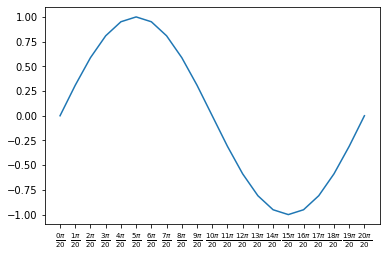

In [49]:
# Genera una serie con once valores entre cero y 2pi
# Genera una nueva serie con los valores del seno de la serie anterior
# Grafica
import matplotlib.pyplot as plt

n=20
valores=np.sin(np.linspace(0,2*np.pi, n+1))
indices=[r"$\frac{"+str(i)+r"\pi}{20}$" for i in range(n+1)]
s4=Series(valores, index=indices)
plt.plot(s4)

### Filtros estilo numpy
Se puede utilizar un filtro donde se aplique la misma serie.

In [51]:
# Filtra de la serie 3, los valores mayores a 0
display(s3>0)
s3[s3>0]

a    False
b    False
c    False
d     True
e    False
f     True
g    False
h    False
i     True
j    False
dtype: bool

d    1
f    2
i    2
dtype: int32

Se puede considerar una serie de pandas como un diccionario de python, por lo 
que acepta los mismos operadores.  
Estos operadores trabajan sobre los índices.

In [55]:
# Revisa si la x es parte de los índices serie 3
# Revisa si la g es parte de los índices serie 3
display(s3)
display("x" in s3)
display("g" in s3)

a    -3
b   -10
c     0
d     1
e    -2
f     2
g    -3
h    -2
i     2
j    -3
dtype: int32

False

True

False

In [56]:
# Revisa si el 2 es parte de los índices de la serie 3
2 in s3


False

In [16]:
d = {"Jalisco": 8348, "Colima":731, "Aguascalientes":1425, "Michoacán":4748, "Zacatecas":1622, "Nayarit":1235}
display(d)
# Genera una serie a partir del siguiente diccionario
# Población en miles de estados colindantes a Jalisco (2020)


{'Jalisco': 8348,
 'Colima': 731,
 'Aguascalientes': 1425,
 'Michoacán': 4748,
 'Zacatecas': 1622,
 'Nayarit': 1235}

In [60]:
# Al utilizar un diccionario para generar una serie, 
# se puede especificar cuáles son los índices que se deben utilizar
s6 = Series(d)
encabezado("Serie 6")
display(s6)

indices = ["Jalisco","Colima","Michoacán","Zacatecas","Nayarit","Sinaloa", "Tamaulipas"]
s7=Series(d,index=indices)
encabezado("Serie 7")
s7


--------------------------------------------------
[Serie 6]
--------------------------------------------------


Jalisco           8348
Colima             731
Aguascalientes    1425
Michoacán         4748
Zacatecas         1622
Nayarit           1235
dtype: int64


--------------------------------------------------
[Serie 7]
--------------------------------------------------


Jalisco       8348.0
Colima         731.0
Michoacán     4748.0
Zacatecas     1622.0
Nayarit       1235.0
Sinaloa          NaN
Tamaulipas       NaN
dtype: float64

## Validación de los valores
Si algún dato de nuestra serie es nulo, podemos detectar datos inválidos con las funciones __isnull__ o __notnull__

In [61]:
# Muestra cuáles de los elementos de la serie anterior son nulos
encabezado("Cuales son nulos")
s7.isnull()

Jalisco       False
Colima        False
Michoacán     False
Zacatecas     False
Nayarit       False
Sinaloa        True
Tamaulipas     True
dtype: bool

In [62]:
# Muestra cuáles de los elementos de la serie anterior no son nulos
encabezado("Cuales no son nulos")
s7.notnull()


--------------------------------------------------
[Cuales no son nulos]
--------------------------------------------------


Jalisco        True
Colima         True
Michoacán      True
Zacatecas      True
Nayarit        True
Sinaloa       False
Tamaulipas    False
dtype: bool

In [63]:
# Filtra los elementos nulos de la serie anterior con un filtro tipo numpy
s7[s7.notnull()]

Jalisco      8348.0
Colima        731.0
Michoacán    4748.0
Zacatecas    1622.0
Nayarit      1235.0
dtype: float64

También podemos revisar qué valores hay en la serie con las funciones:  
- __isin__: revisa para cada valor si pertenece a una estructura
- __unique__: regresa todos los valores que pertenecen a la serie, sin repetidos
- __value_counts__: regresa todos los valores que pertenecen a la serie, y cuántas veces aparecen

In [66]:
# utiliza isin para mostrar qué valores están entre -3 y 0
filt = s3.isin([-3, 0])
s3[filt]

a   -3
c    0
g   -3
j   -3
dtype: int32

In [67]:
# utiliza unique sobre s3
s3.unique()

array([ -3, -10,   0,   1,  -2,   2])

Se pueden aplicar operaciones automáticamente sobre dos series alineando los datos utilizando el índice

In [69]:
# utiliza value_counts sobre s3
s3.value_counts()>=2


-3      True
 2     False
-2     False
 0     False
 1     False
-10    False
dtype: bool

In [72]:
## Filtra de s3 sólo los valores que aparecen 2 o más veces

filtro = s3.value_counts()[s3.value_counts() >= 2]
display(filtro)
display(s3.isin(filtro))
s3[s3.isin(filtro)]


-3    3
 2    2
-2    2
dtype: int64

a    False
b    False
c    False
d    False
e    False
f     True
g    False
h    False
i     True
j    False
dtype: bool

f    2
i    2
dtype: int32

## Operaciones entre Series
Se pueden realizar operaciones aritméticas entre series.
Al hacerlo, se utilizarán las etiquetas para alinear los datos.

In [74]:
# Genera serie 8 y serie 9 con etiquetas en común
s8 = Series(list("guadalajara")).value_counts()
s9 = Series(list("guatemala")).value_counts()
encabezado("Serie 8")
display(s8)
encabezado("Serie 9")
display(s9)


--------------------------------------------------
[Serie 8]
--------------------------------------------------


a    5
u    1
r    1
j    1
g    1
d    1
l    1
dtype: int64


--------------------------------------------------
[Serie 9]
--------------------------------------------------


a    3
e    1
t    1
u    1
m    1
g    1
l    1
dtype: int64

In [75]:
# Suma s8 con s9
s8+s9

a    8.0
d    NaN
e    NaN
g    2.0
j    NaN
l    2.0
m    NaN
r    NaN
t    NaN
u    2.0
dtype: float64

## Atributos de una serie
Una serie, además de valores e índice, también tiene otros atributos: 
- value
- index
- name
- dtype

In [78]:
s6.name="Población 2020"
encabezado("Serie 6")
s6


--------------------------------------------------
[Serie 6]
--------------------------------------------------


Jalisco           8348
Colima             731
Aguascalientes    1425
Michoacán         4748
Zacatecas         1622
Nayarit           1235
Name: Población 2020, dtype: int64

In [83]:
# Para modificar un índice en particular
obj = list(s2.index)
obj[0] = "e"
s2.index = obj
s2


e    100
a      7
r     -5
x      3
dtype: int32